In [104]:
%matplotlib inline

In [105]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np



In [106]:
PATCH_SIZE = 35

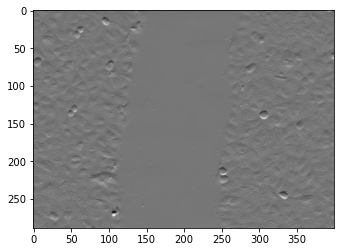

In [107]:
image = io.imread('scratch.jpeg')
plt.imshow(image, cmap='gray')

In [108]:
#Full image
# We extract greycomatrix on image with a distance of 1
#we use a as a dummy variable where we only extract energy
GLCM = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a = greycoprops(GLCM, 'energy') [0,0]

In [109]:
# select some patches from grassy areas of the image
#visually look at cell region and select the more heavily textured area

cell_locations = [(50,50), (200,50), (50,350), (200,350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                              loc[1]:loc[1] + PATCH_SIZE])

In [110]:
# Select some patches from the smoother areas of image

scratch_locations = [(50, 200), (150, 200), (250, 150), (200, 200)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE, 
                                 loc[1]:loc[1] + PATCH_SIZE])

In [111]:
# Compute some GLCM properties for each patch
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) 
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])

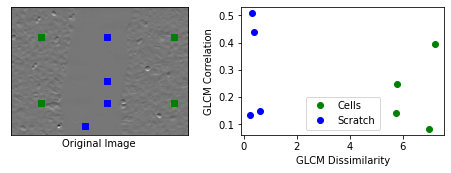

In [115]:
# display original image with locations of patches

fig = plt.figure(figsize=(8, 8))
#import style from matplotlib
from matplotlib import style

ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

Green dots(cell locations) suggest high dissimilarity.
Lower dissimilarity for scratch/blue dots
We are able to segment these two regions 

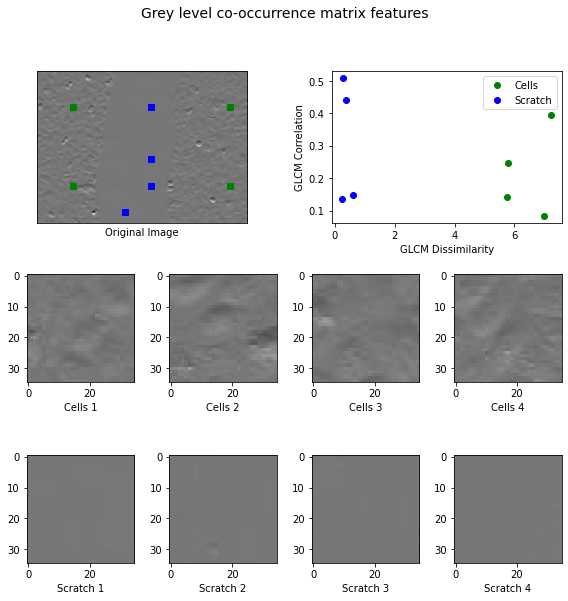

In [117]:
# display original image with locations of patches

fig = plt.figure(figsize=(8, 8))
#import style from matplotlib
from matplotlib import style

ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in scratch_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(diss_sim[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(diss_sim[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))
    
# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [116]:
# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))

for i, patch in enumerate(scratch_patches):
    ax = fig.add_subplot(3, len(scratch_patches), len(scratch_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Scratch %d' % (i + 1))

In [96]:
# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>